In [1]:
import numpy as np
import pandas as pd
import time, os, sys
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
from sklearn.metrics import precision_recall_fscore_support, classification_report, adjusted_mutual_info_score
from sklearn.metrics import multilabel_confusion_matrix

In [3]:
import tcremb.ml_utils as ml_utils
import benchmark.models as models
import benchmark.metrics as metrics
import tcremb.TCRemb as TCRemb
from sklearn.cluster import KMeans,DBSCAN

In [4]:
label = 'antigen.epitope'
label_s = 'antigen.species'
#label = 'antigen.species_freq'
#output_suf = 'vdjdb_freq'
#output_suf = 'vdjdb'
#output_suf_s = 'vdjdb_s'

## Run with different protototypes

In [5]:
samples_n = [10,50,100,500,1000]
prototypes_n = [100, 1000, 5000]

In [26]:
def run_tcremb_v(chain, run_name, v_path, proto_path):
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v,prototypes_path=proto_path_dict)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists_count(chain)
    tcremb.tcremb_dists(chain)
    

In [32]:
for i in samples_n:
    for j in prototypes_n:
        run_name = f'compare_V{i}_{j}'
        proto_path_dict = {'TRA' :f'data/data_preped/olga_humanTRA_{j}.txt', 'TRB' : f'data/data_preped/olga_humanTRB_{j}.txt'}
    
        chain='TRA'
        v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
        run_tcremb_v(chain, run_name, v_path, proto_path_dict)
        chain='TRB'
        v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
        run_tcremb_v(chain, run_name, v_path, proto_path_dict)

{'TRA': 'data/data_preped/olga_humanTRA_100.txt', 'TRB': 'data/data_preped/olga_humanTRB_100.txt'}
[κ0 CASNTGTASKLTF, κ1 CAVLLEYGNKLVF, κ2 CVVSAIMDSNYQLIW, κ3 CLVGATTDSWGKLQF, κ4 CLVGPLSGGYNKLIF, κ5 CAGAVGNQFYF, κ6 CAVNDNDKIIF, κ7 CALSDPTSGGYQKVTF, κ8 CAEAEGGGSQGNLIF, κ9 CAVRATGTASKLTF]
(10153, 292)
11.83747410774231
{'TRA': 'data/data_preped/olga_humanTRA_100.txt', 'TRB': 'data/data_preped/olga_humanTRB_100.txt'}
[κ0 CASSAFPCREGRNNEQFF, κ1 CASSHGVGQGPYEQYF, κ2 CASSLTTESGEQYF, κ3 CASSLGTLEETQYF, κ4 CASIPEGGRETQYF, κ5 CASSLDSLNTIYF, κ6 CASSQDTASSYEQYF, κ7 CASSLSYRGNSPLHF, κ8 CASSEALRDSGGQYF, κ9 CSADGLPISSYNEQFF]
(21725, 301)
24.593179941177368
{'TRA': 'data/data_preped/olga_humanTRA_1000.txt', 'TRB': 'data/data_preped/olga_humanTRB_1000.txt'}
[κ0 CASNTGTASKLTF, κ1 CAVLLEYGNKLVF, κ2 CVVSAIMDSNYQLIW, κ3 CLVGATTDSWGKLQF, κ4 CLVGPLSGGYNKLIF, κ5 CAGAVGNQFYF, κ6 CAVNDNDKIIF, κ7 CALSDPTSGGYQKVTF, κ8 CAEAEGGGSQGNLIF, κ9 CAVRATGTASKLTF]
(10153, 2932)
125.23923087120056
{'TRA': 'data/data_preped/

## Compare

In [5]:
samples_n = [10,50,100,500,1000]
#samples_n = [500,1000]

In [6]:
metrics_tcremb = {}

### dbscan eps

In [7]:
method = 'dbscan'
metrics_tcremb[method]={}
params=[3, 10,25, 50,75, 100,150,200,250,300,350,400,450, 500,550, 600,650, 700,750, 800,850, 900,950, 1000, 1050,1100,1150, 1200,1250, 1300,1350, 1400,1450, 1500]
#params = [3, 1500]

In [ ]:
chain = 'TRA'
metrics_tcremb[method][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    for j in params:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = DBSCAN(eps=j, min_samples=2)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][chain][f'{i}_{j}']['eps']=j
        metrics_tcremb[method][chain][f'{i}_{j}']['v']=f'V{i} dataset size:{len(tcremb.pca_clones[chain])}'

In [ ]:
chain = 'TRB'
metrics_tcremb[method][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    for j in params:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = DBSCAN(eps=j, min_samples=2)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][chain][f'{i}_{j}']['eps']=j
        metrics_tcremb[method][chain][f'{i}_{j}']['v']=f'V{i} dataset size:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


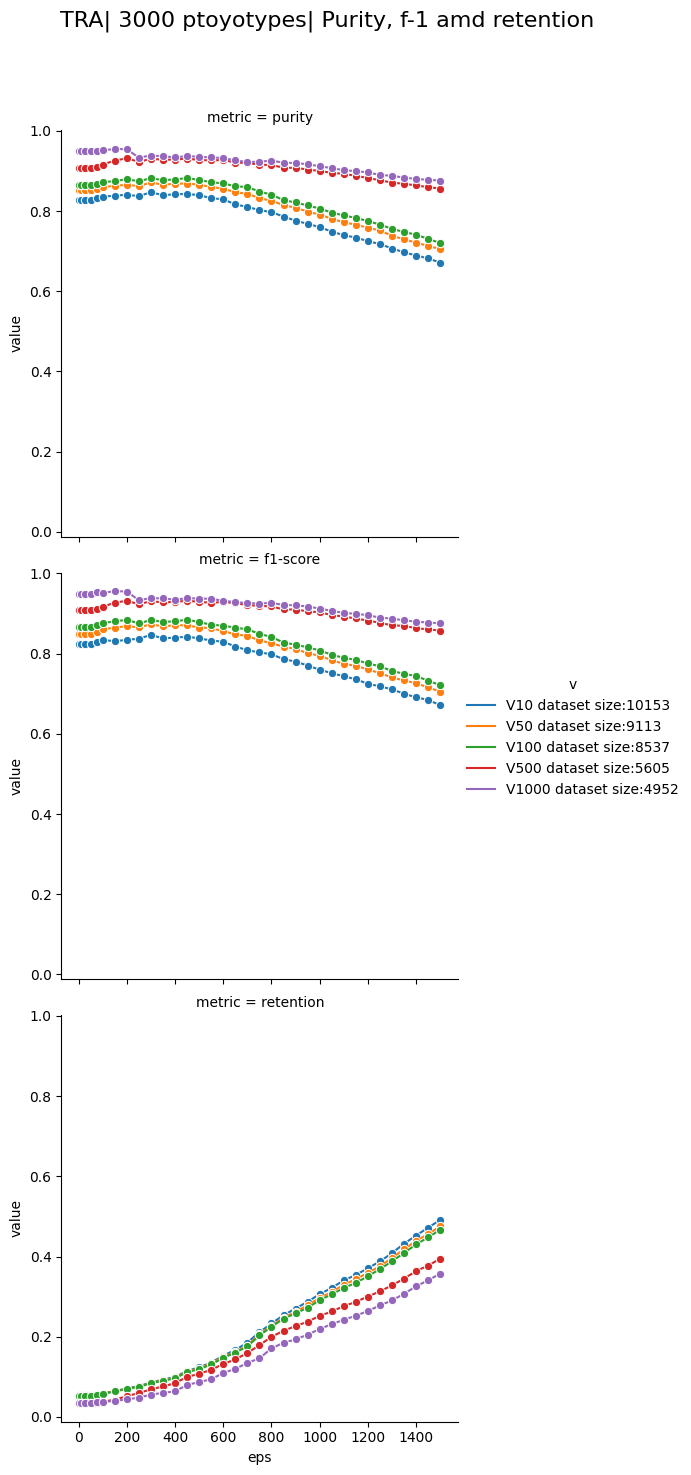

In [11]:
chain = 'TRA'
n_prototypes = 3000
method = 'dbscan'
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
t = metrics_df[['purity','f1-score','retention','eps','v']].melt(id_vars=['eps','v'],var_name='metric')
g = sns.relplot(data = t, x = 'eps', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"figures/tcremb_compare_{method}_{chain}.png")

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


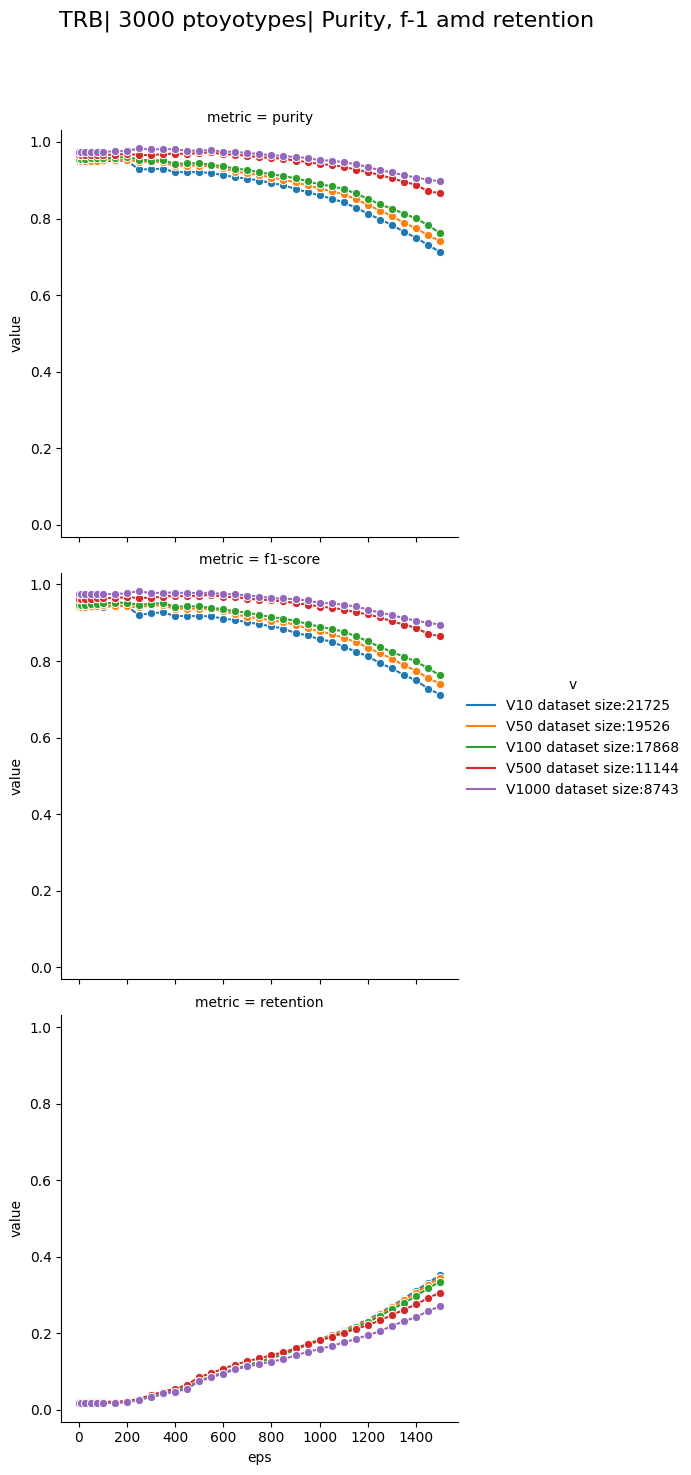

In [18]:
chain = 'TRB'
n_prototypes = 3000
method = 'dbscan'
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
t = metrics_df[['purity','f1-score','retention','eps','v']].melt(id_vars=['eps','v'],var_name='metric')
g = sns.relplot(data = t, x = 'eps', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"figures/tcremb_compare_{method}_{chain}.png")

### Kmeans n_clusters

In [13]:
method = 'kmeans'
metrics_tcremb[method]={}

In [ ]:
chain = 'TRA'
metrics_tcremb[method][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    data_len = len(tcremb.pca_clones[chain])
    
    range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)                    
                        ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                        , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
    for j in range_n_clusters:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = KMeans(n_clusters=j)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][chain][f'{i}_{j}']['n_clusters']=j
        metrics_tcremb[method][chain][f'{i}_{j}']['v']=f'V{i} dataset size:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


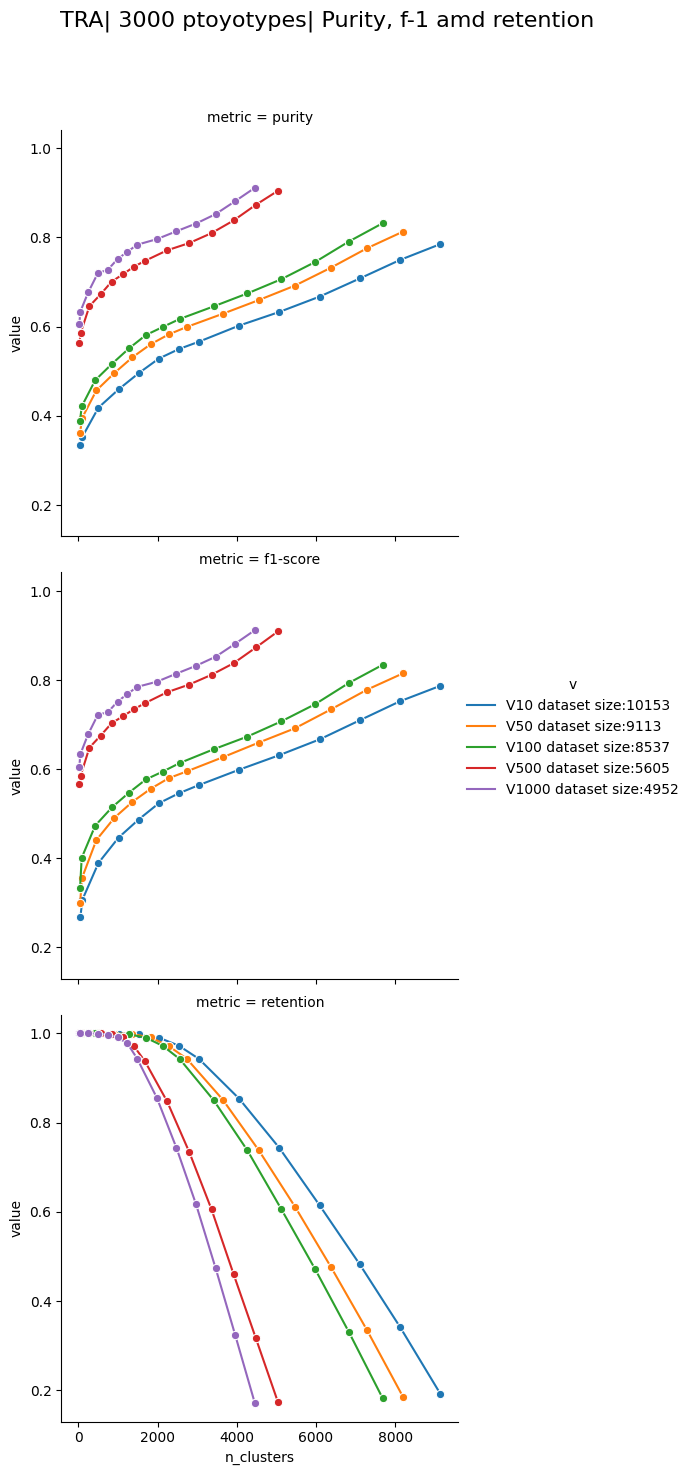

In [15]:
chain = 'TRA'
n_prototypes=3000
method = 'kmeans'
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
t = metrics_df[['purity','f1-score','retention','n_clusters','v']].melt(id_vars=['n_clusters','v'],var_name='metric')
g = sns.relplot(data = t, x = 'n_clusters', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"figures/tcremb_compare_{n_prototypes}_{method}_{chain}.png")

In [ ]:
chain = 'TRB'
metrics_tcremb[method][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    data_len = len(tcremb.pca_clones[chain])
    
    range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)                    
                        ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                        , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
    for j in range_n_clusters:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = KMeans(n_clusters=j)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][chain][f'{i}_{j}']['n_clusters']=j
        metrics_tcremb[method][chain][f'{i}_{j}']['v']=f'V{i} dataset size:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


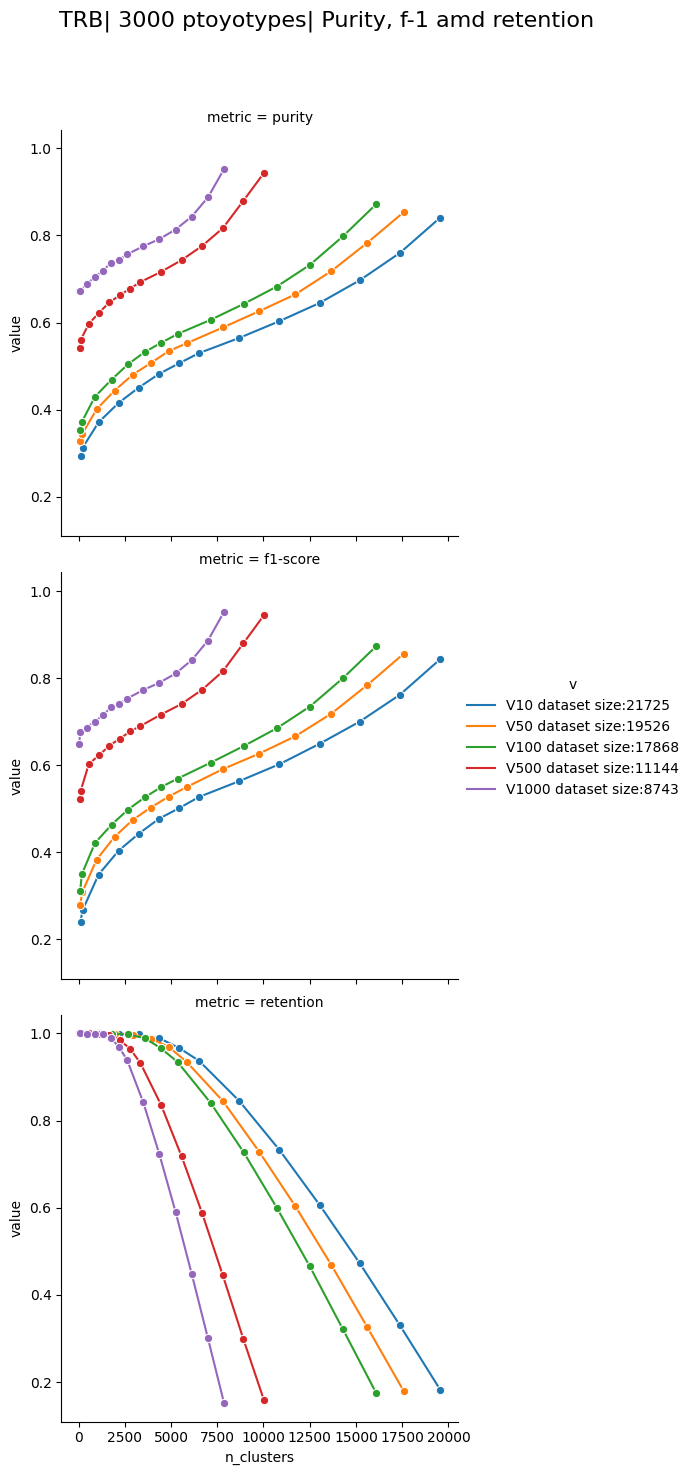

In [17]:
chain = 'TRB'
n_prototypes=3000
method = 'kmeans'
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
t = metrics_df[['purity','f1-score','retention','n_clusters','v']].melt(id_vars=['n_clusters','v'],var_name='metric')
g = sns.relplot(data = t, x = 'n_clusters', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"figures/tcremb_compare_{n_prototypes}_{method}_{chain}.png")

In [ ]:
#method = 'kmeans'
#metrics_tcremb[method]={}

In [13]:
n_prototypes = 100
metrics_tcremb[method][n_prototypes]={}

In [ ]:


chain = 'TRA'
metrics_tcremb[method][n_prototypes][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}_{n_prototypes}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    data_len = len(tcremb.pca_clones[chain])
    
    range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)                    
                        ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                        , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
    for j in range_n_clusters:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = KMeans(n_clusters=j)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['n_clusters']=j
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


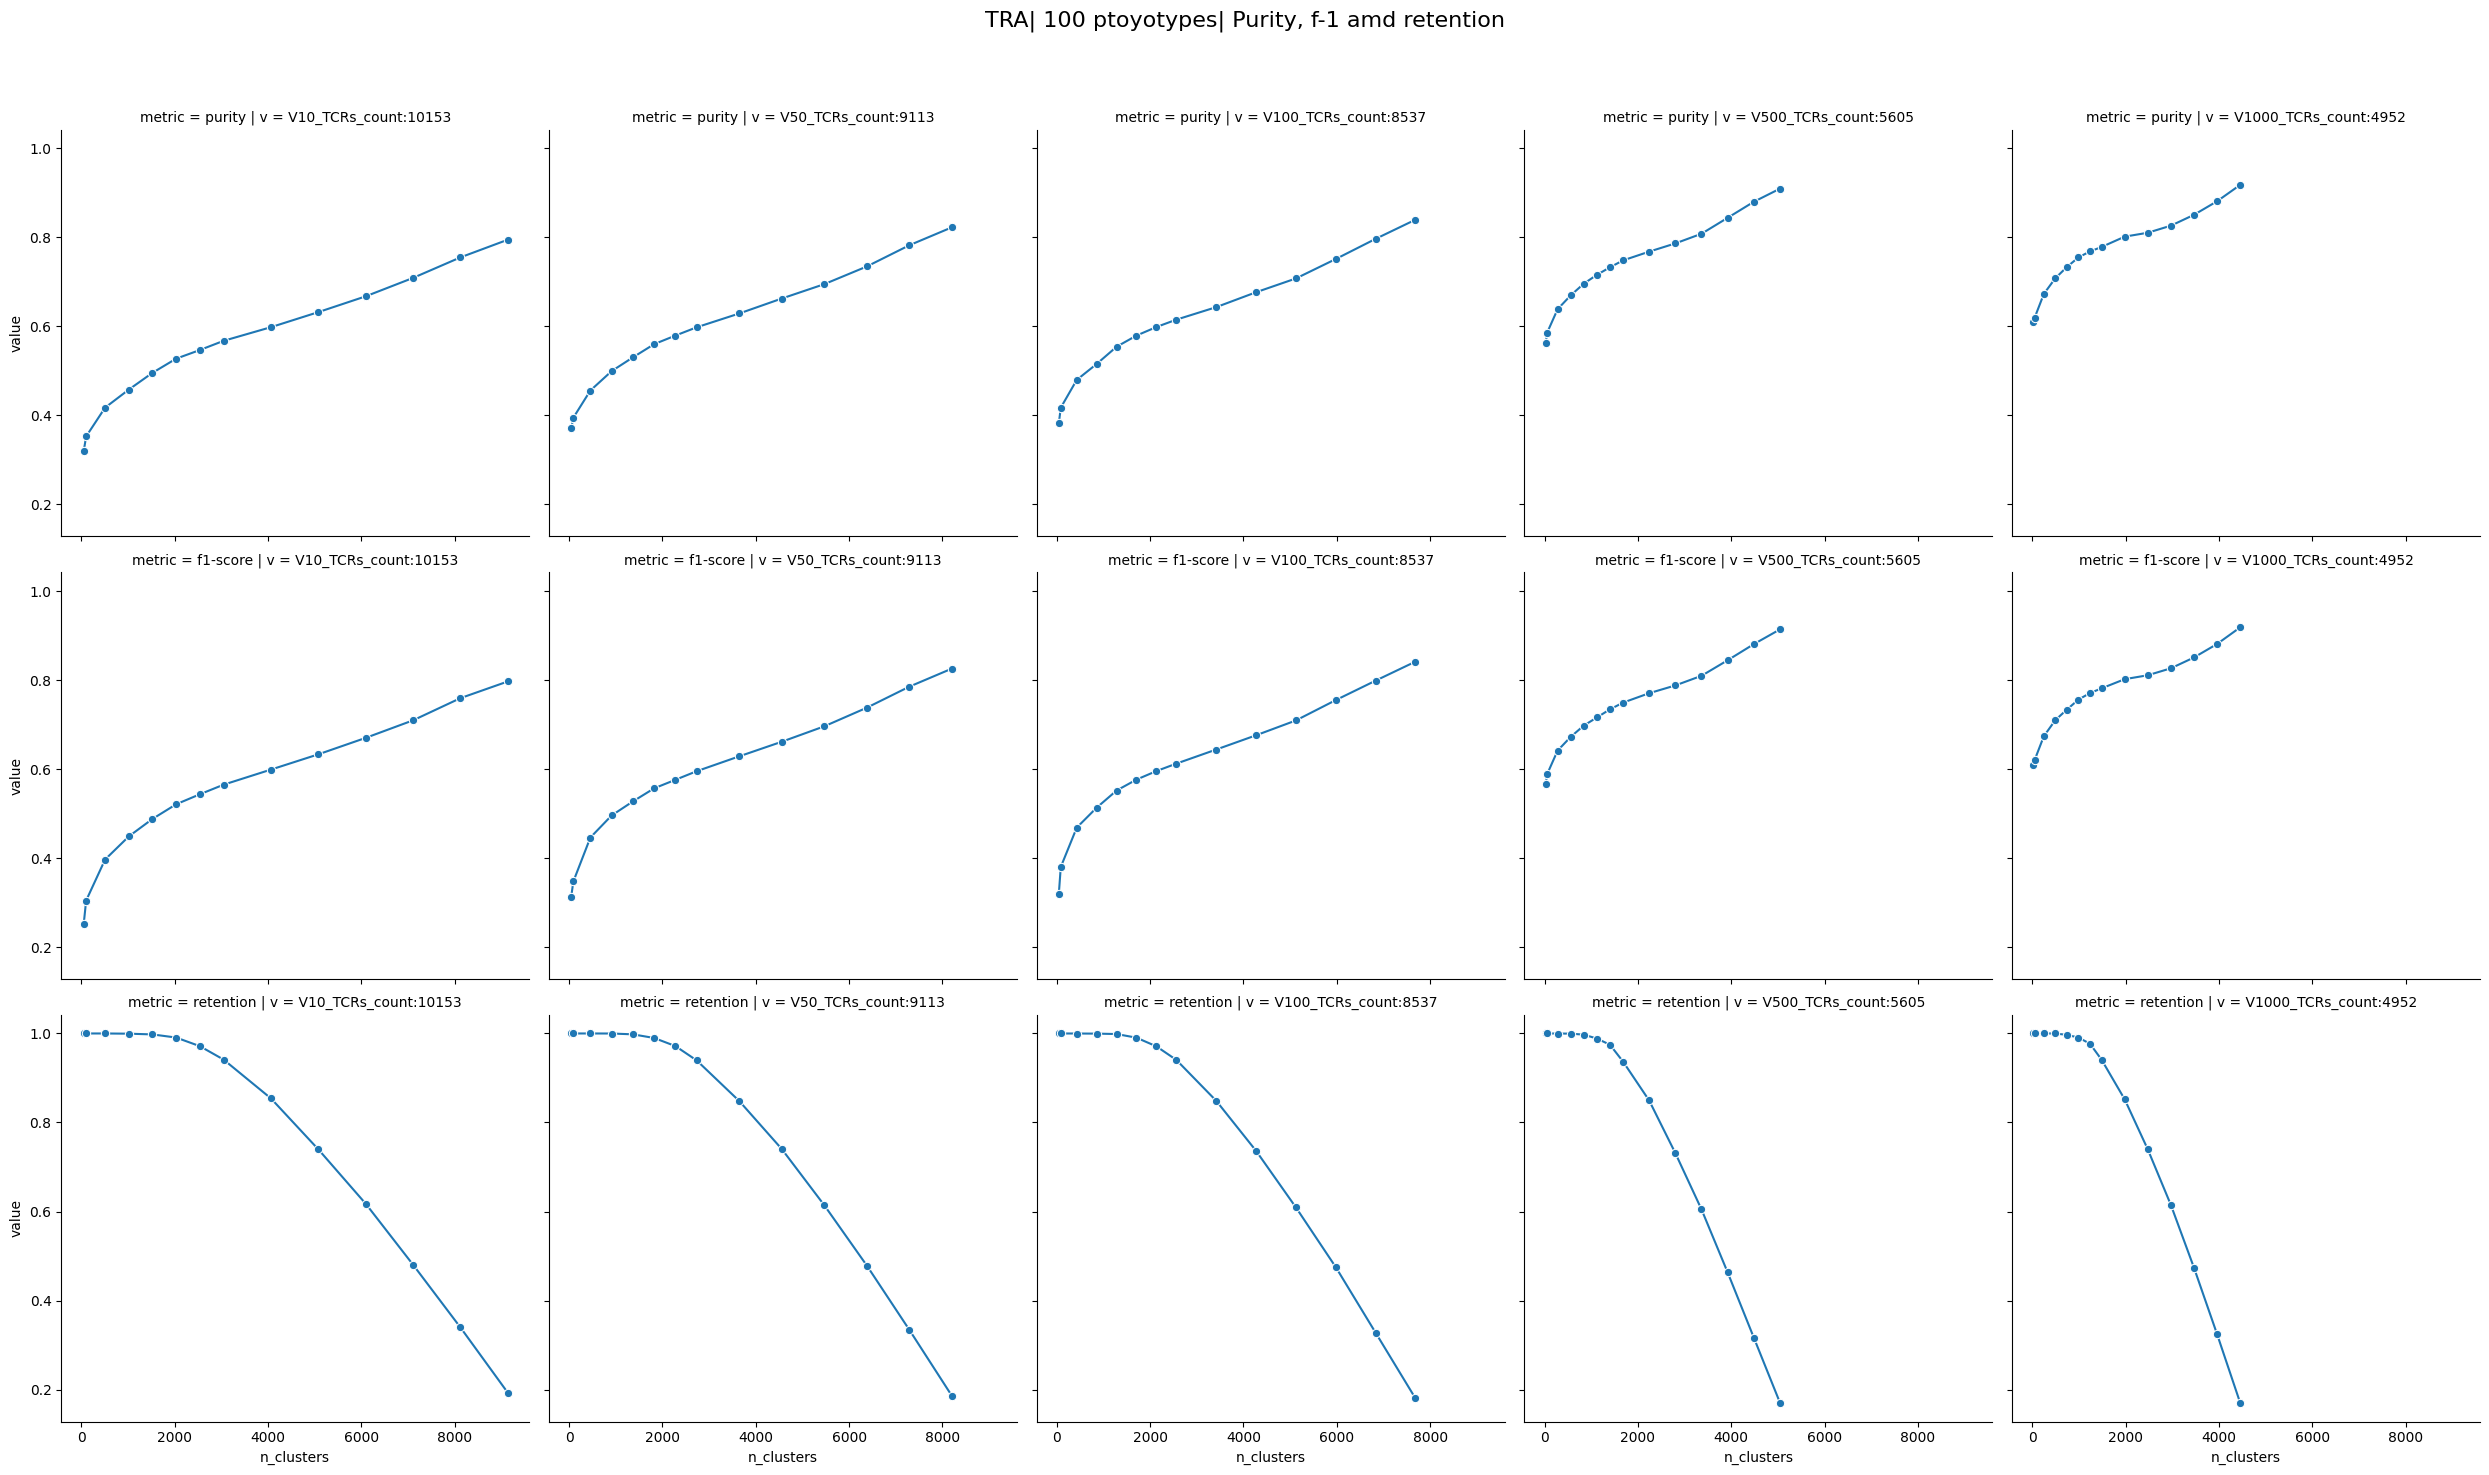

In [15]:
metrics_df = pd.DataFrame(metrics_tcremb[method][n_prototypes][chain]).T
t = metrics_df[['purity','f1-score','retention','n_clusters','v']].melt(id_vars=['n_clusters','v'],var_name='metric')
g = sns.relplot(data = t, x = 'n_clusters', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"figures/tcremb_compare_{n_prototypes}_{method}_{chain}.png")

In [ ]:


chain = 'TRB'
metrics_tcremb[method][n_prototypes][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}_{n_prototypes}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    data_len = len(tcremb.pca_clones[chain])
    
    range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)                    
                        ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                        , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
    for j in range_n_clusters:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = KMeans(n_clusters=j)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['n_clusters']=j
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


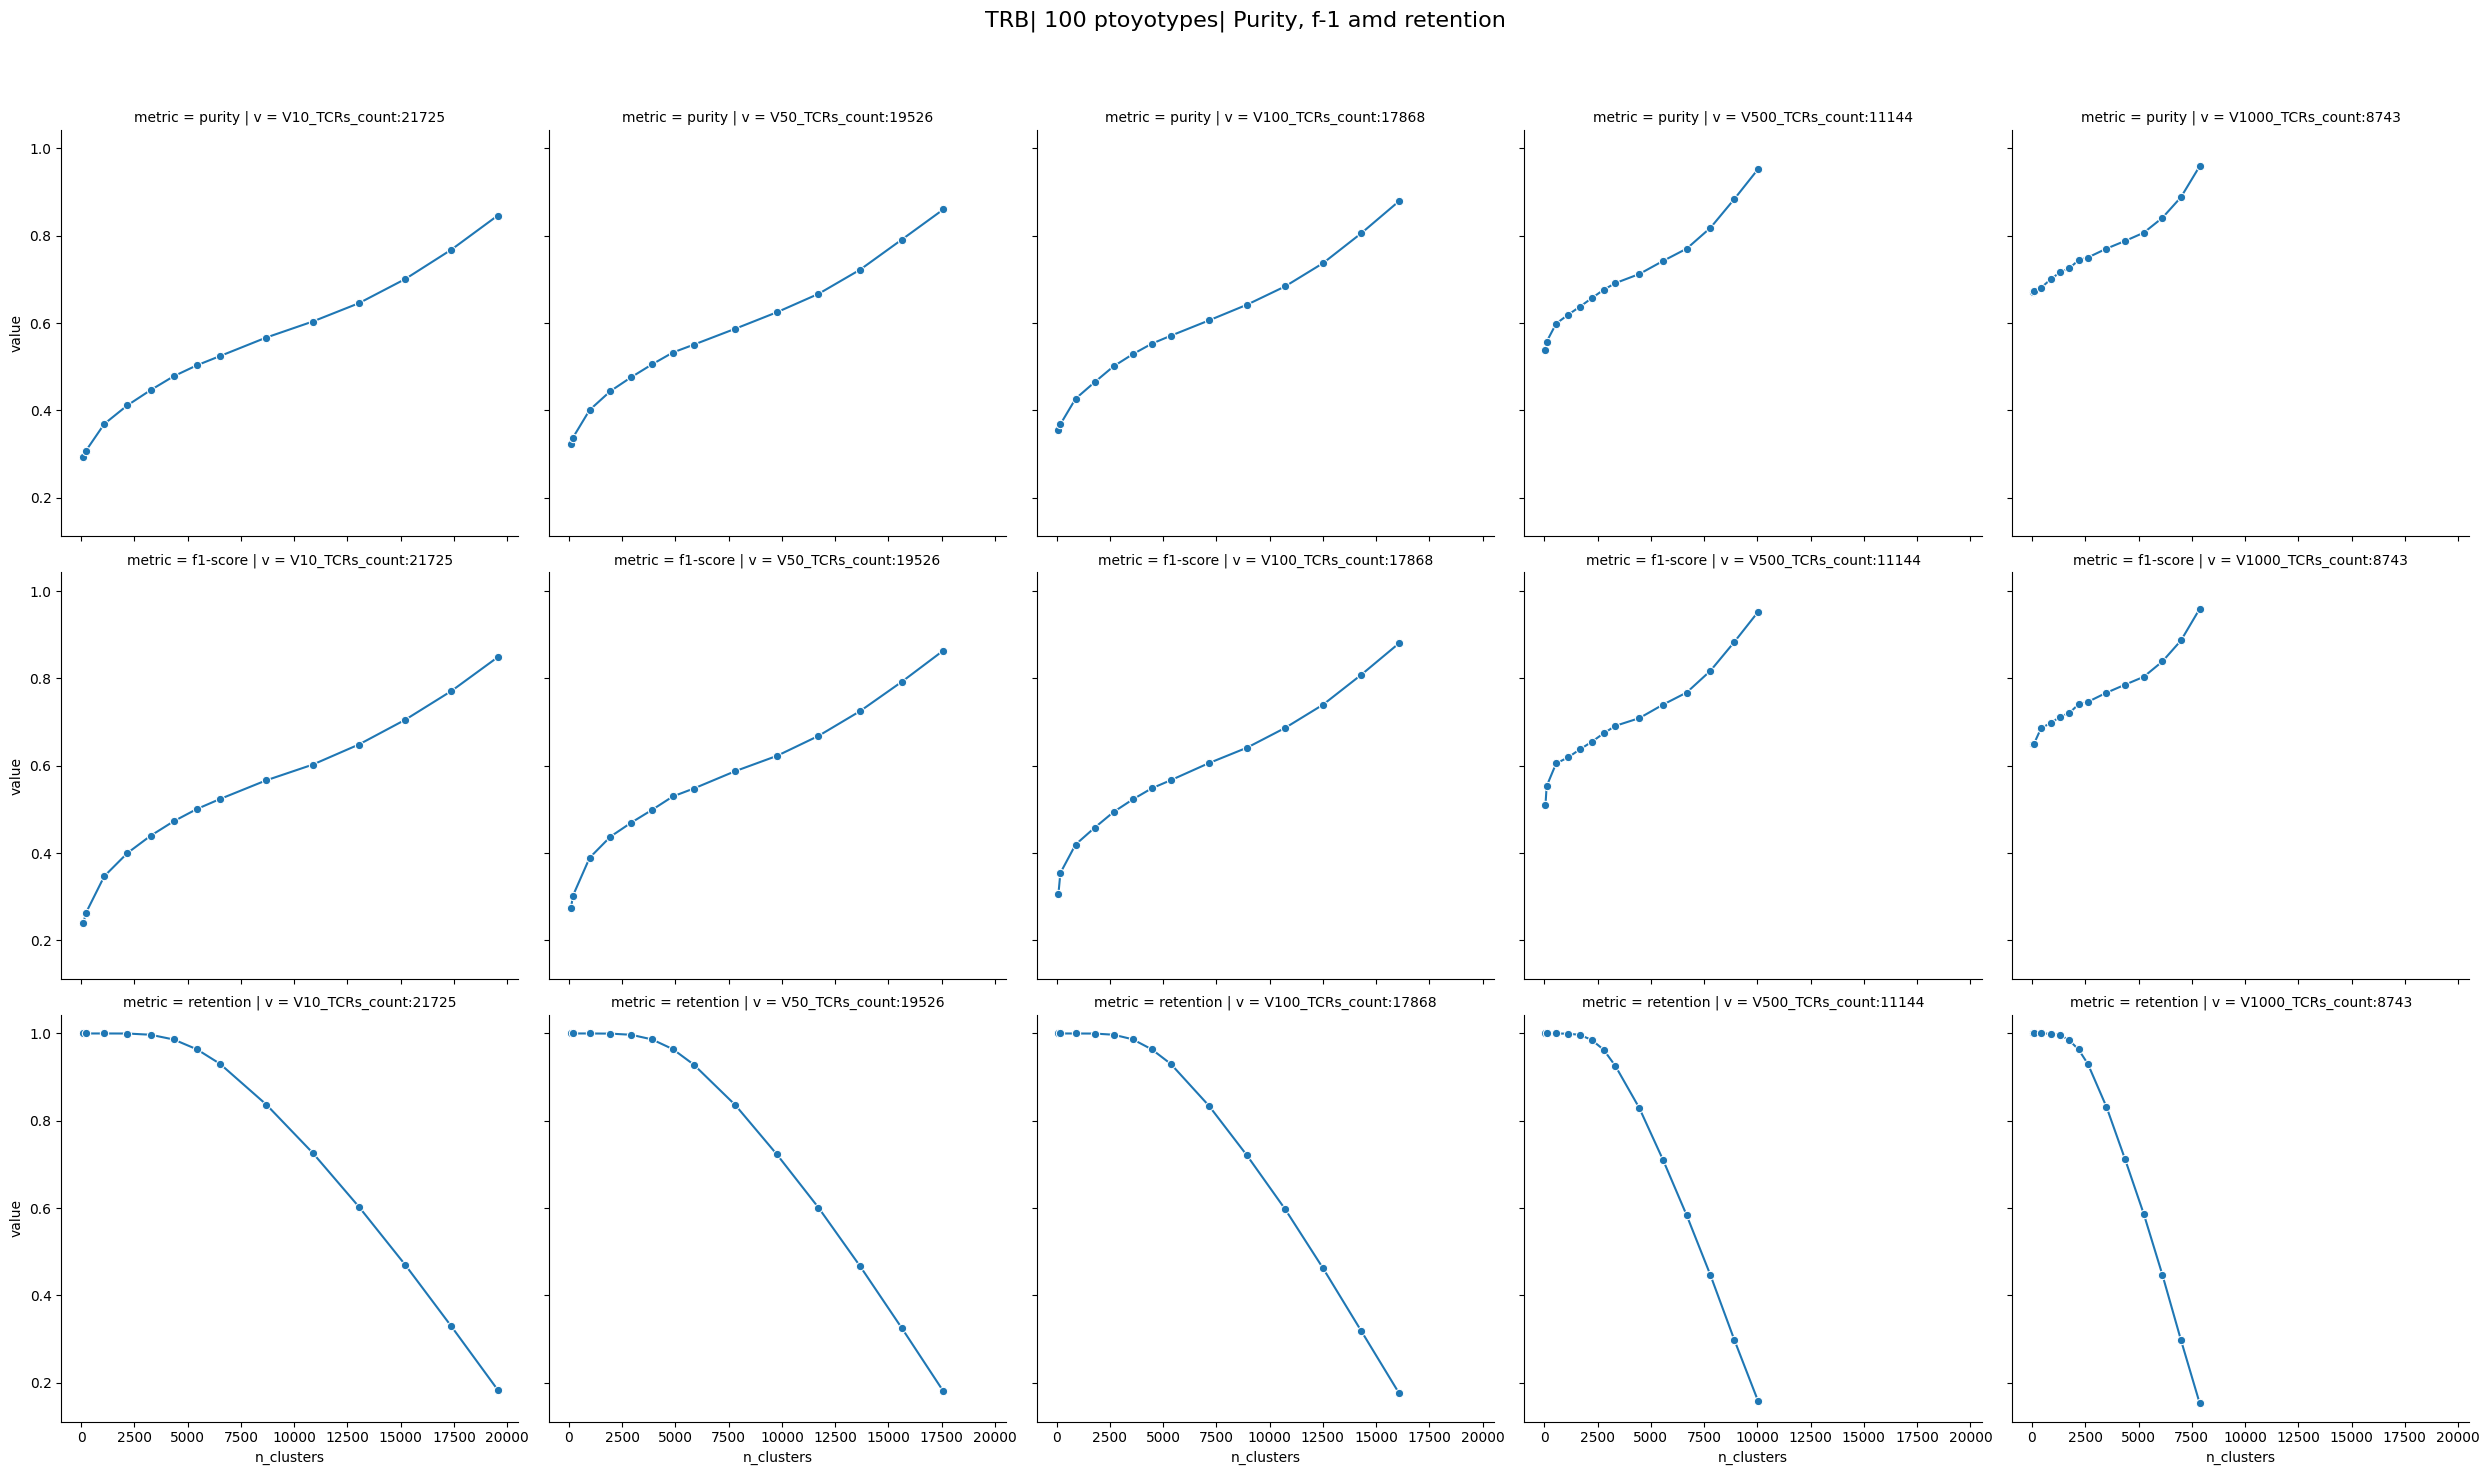

In [17]:
metrics_df = pd.DataFrame(metrics_tcremb[method][n_prototypes][chain]).T
t = metrics_df[['purity','f1-score','retention','n_clusters','v']].melt(id_vars=['n_clusters','v'],var_name='metric')
g = sns.relplot(data = t, x = 'n_clusters', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"figures/tcremb_compare_{n_prototypes}_{method}_{chain}.png")

In [18]:
n_prototypes = 1000
metrics_tcremb[method][n_prototypes]={}

In [ ]:


chain = 'TRA'
metrics_tcremb[method][n_prototypes][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}_{n_prototypes}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    data_len = len(tcremb.pca_clones[chain])
    
    range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)                    
                        ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                        , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
    for j in range_n_clusters:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = KMeans(n_clusters=j)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['n_clusters']=j
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


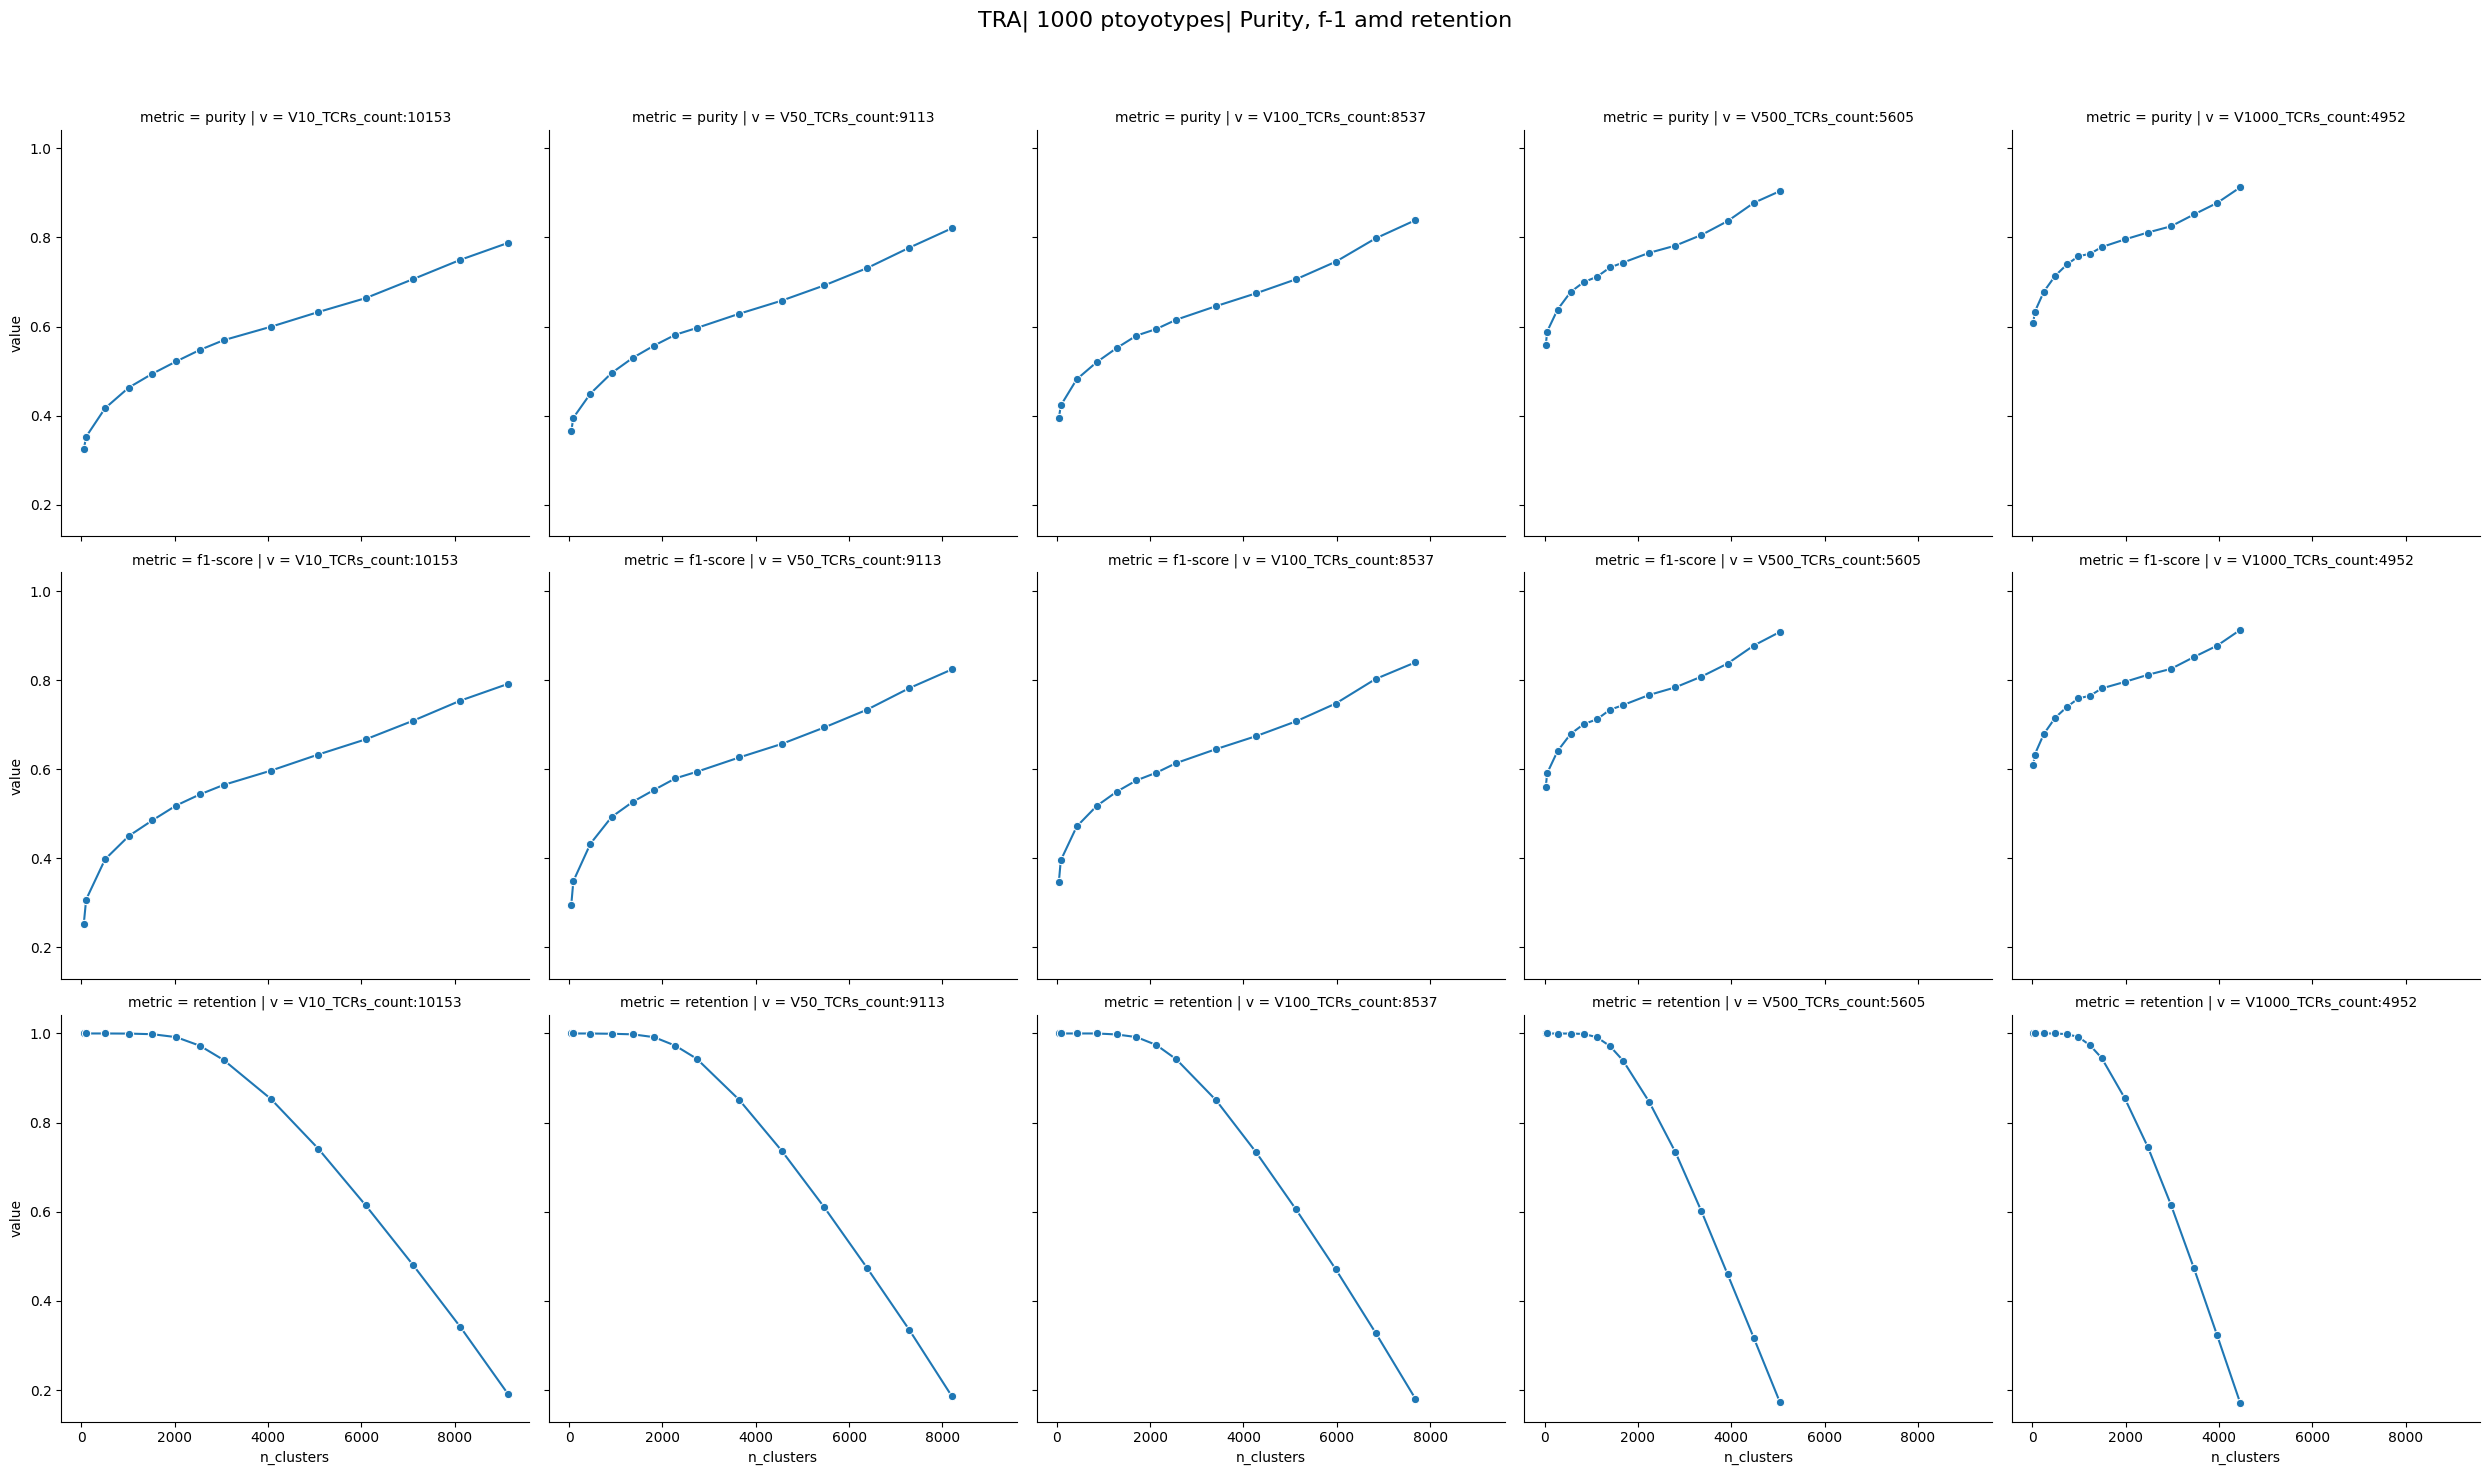

In [20]:
metrics_df = pd.DataFrame(metrics_tcremb[method][n_prototypes][chain]).T
t = metrics_df[['purity','f1-score','retention','n_clusters','v']].melt(id_vars=['n_clusters','v'],var_name='metric')
g = sns.relplot(data = t, x = 'n_clusters', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"figures/tcremb_compare_{n_prototypes}_{method}_{chain}.png")

In [ ]:


chain = 'TRB'
metrics_tcremb[method][n_prototypes][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}_{n_prototypes}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    data_len = len(tcremb.pca_clones[chain])
    
    range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)                    
                        ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                        , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
    for j in range_n_clusters:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = KMeans(n_clusters=j)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['n_clusters']=j
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


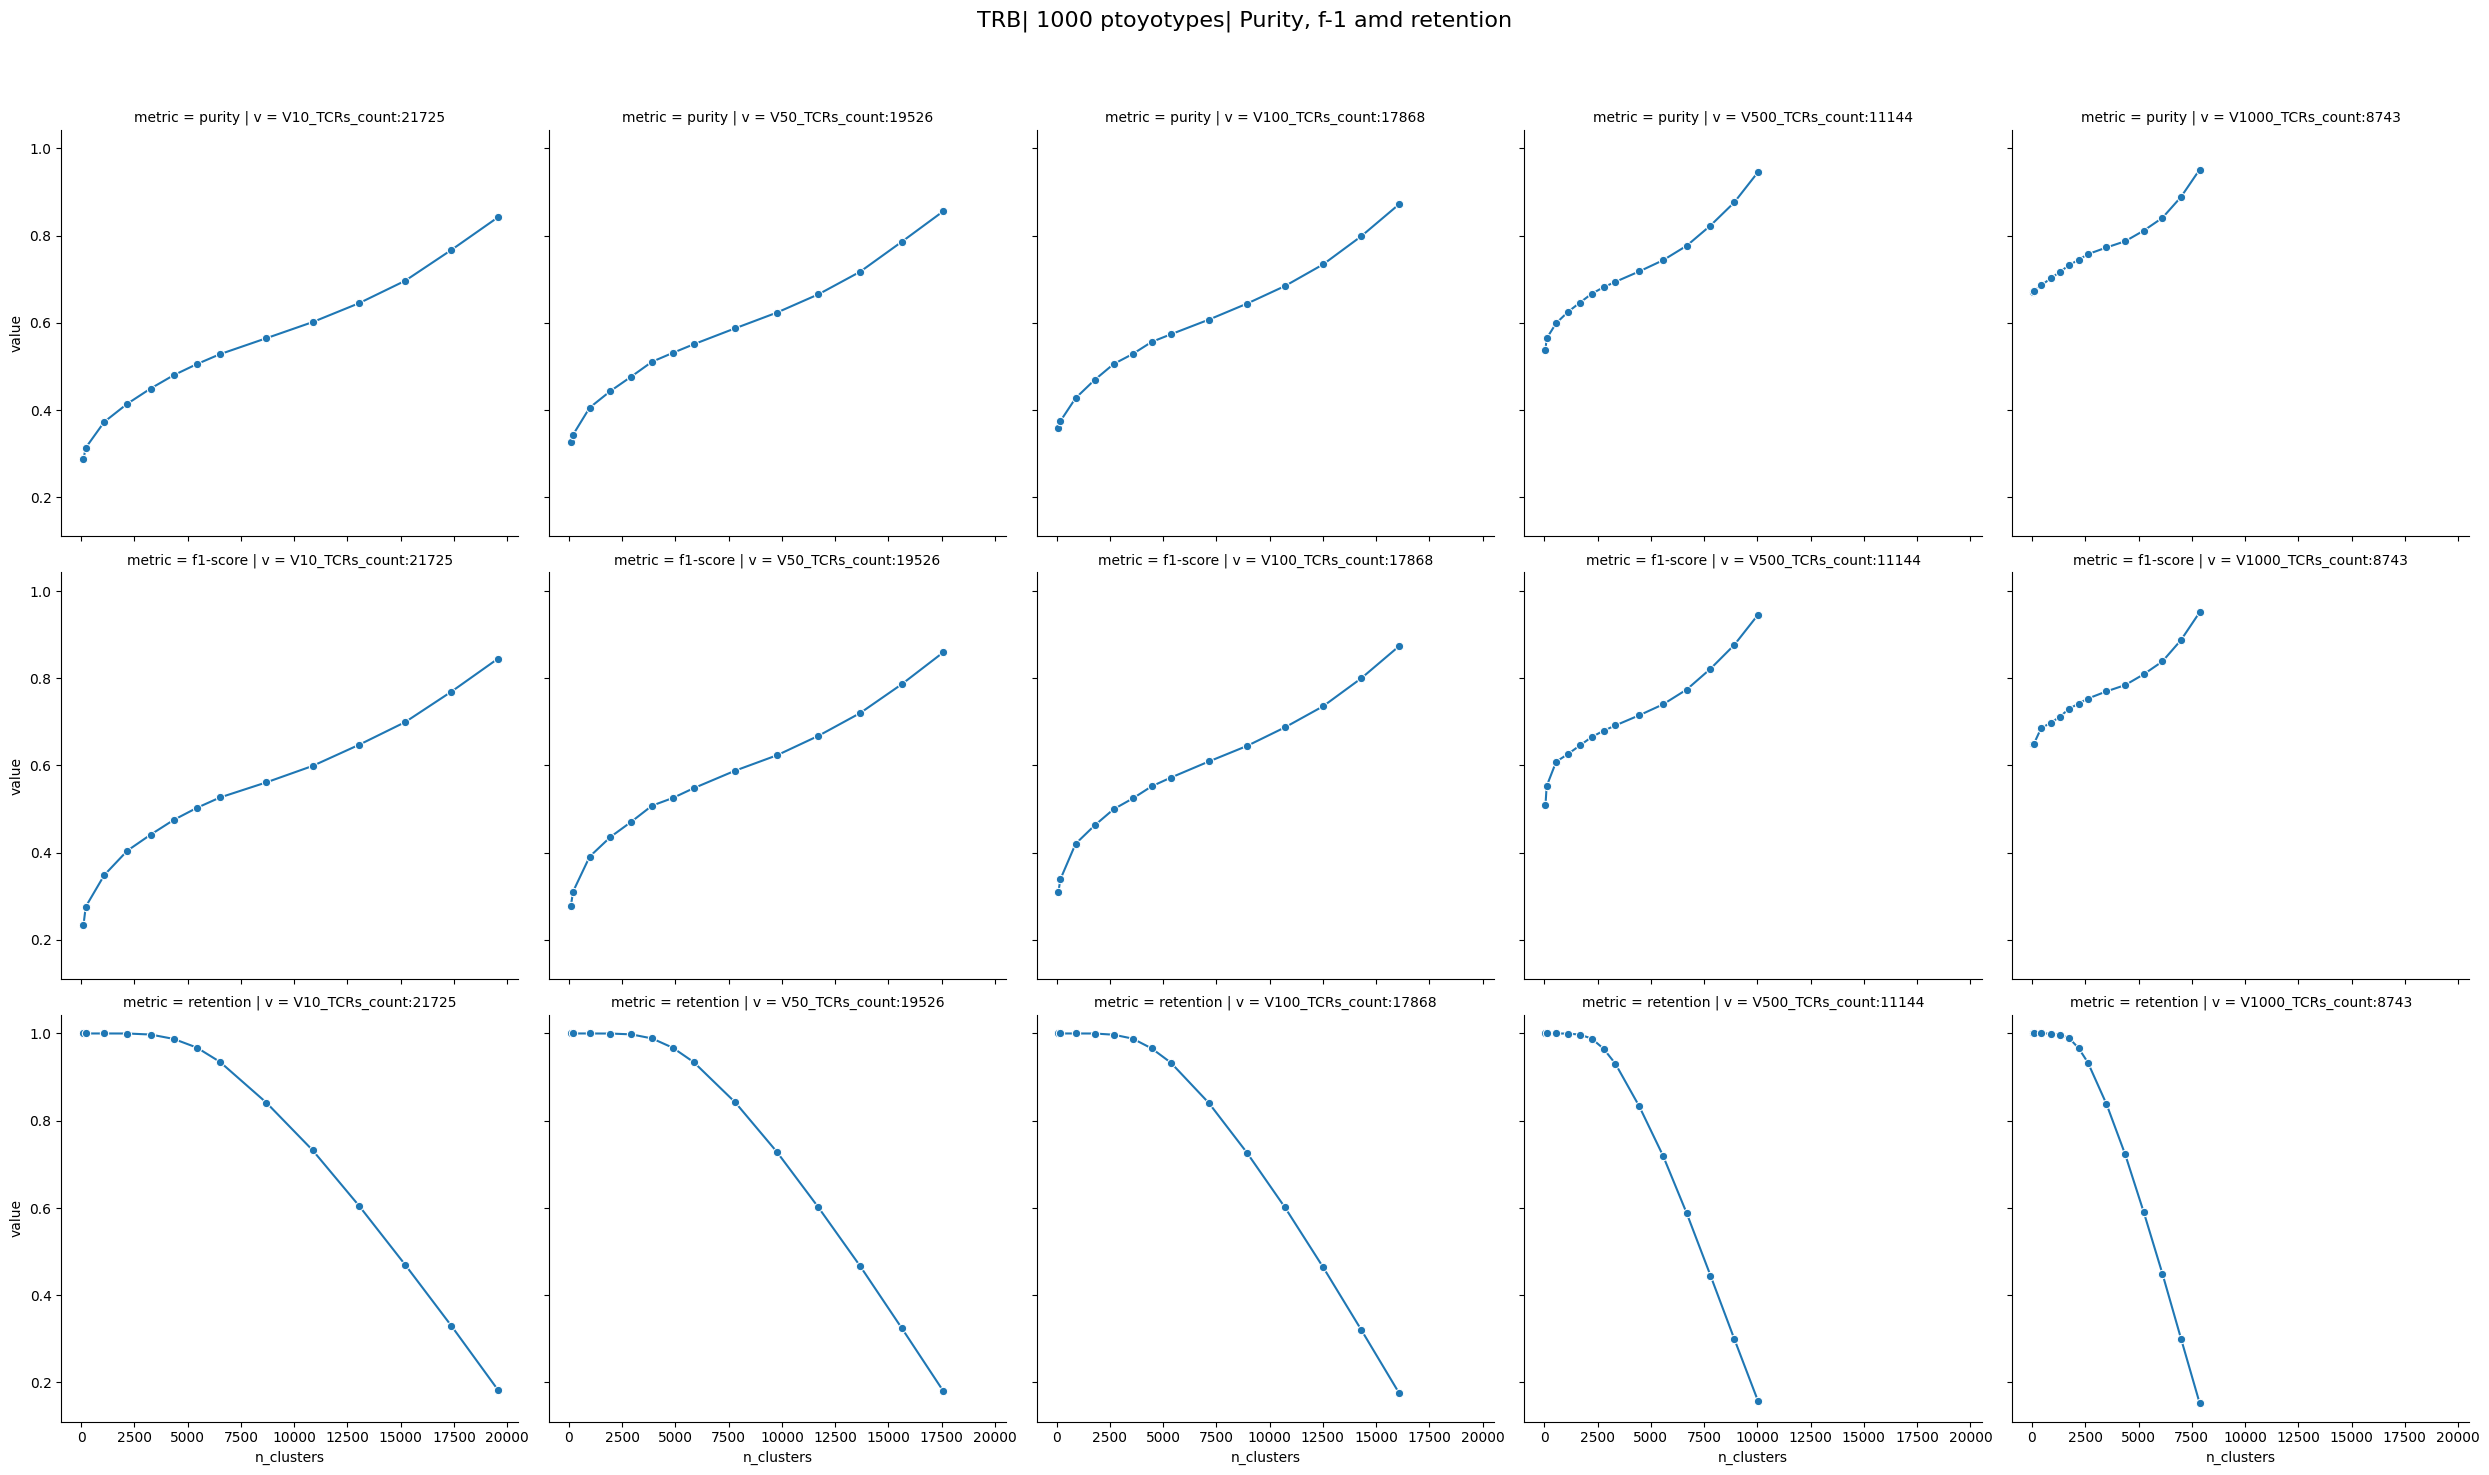

In [22]:
metrics_df = pd.DataFrame(metrics_tcremb[method][n_prototypes][chain]).T
t = metrics_df[['purity','f1-score','retention','n_clusters','v']].melt(id_vars=['n_clusters','v'],var_name='metric')
g = sns.relplot(data = t, x = 'n_clusters', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"figures/tcremb_compare_{n_prototypes}_{method}_{chain}.png")

In [23]:
n_prototypes = 5000
metrics_tcremb[method][n_prototypes]={}

In [ ]:


chain = 'TRA'
metrics_tcremb[method][n_prototypes][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}_{n_prototypes}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    data_len = len(tcremb.pca_clones[chain])
    
    range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)                    
                        ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                        , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
    for j in range_n_clusters:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = KMeans(n_clusters=j)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['n_clusters']=j
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


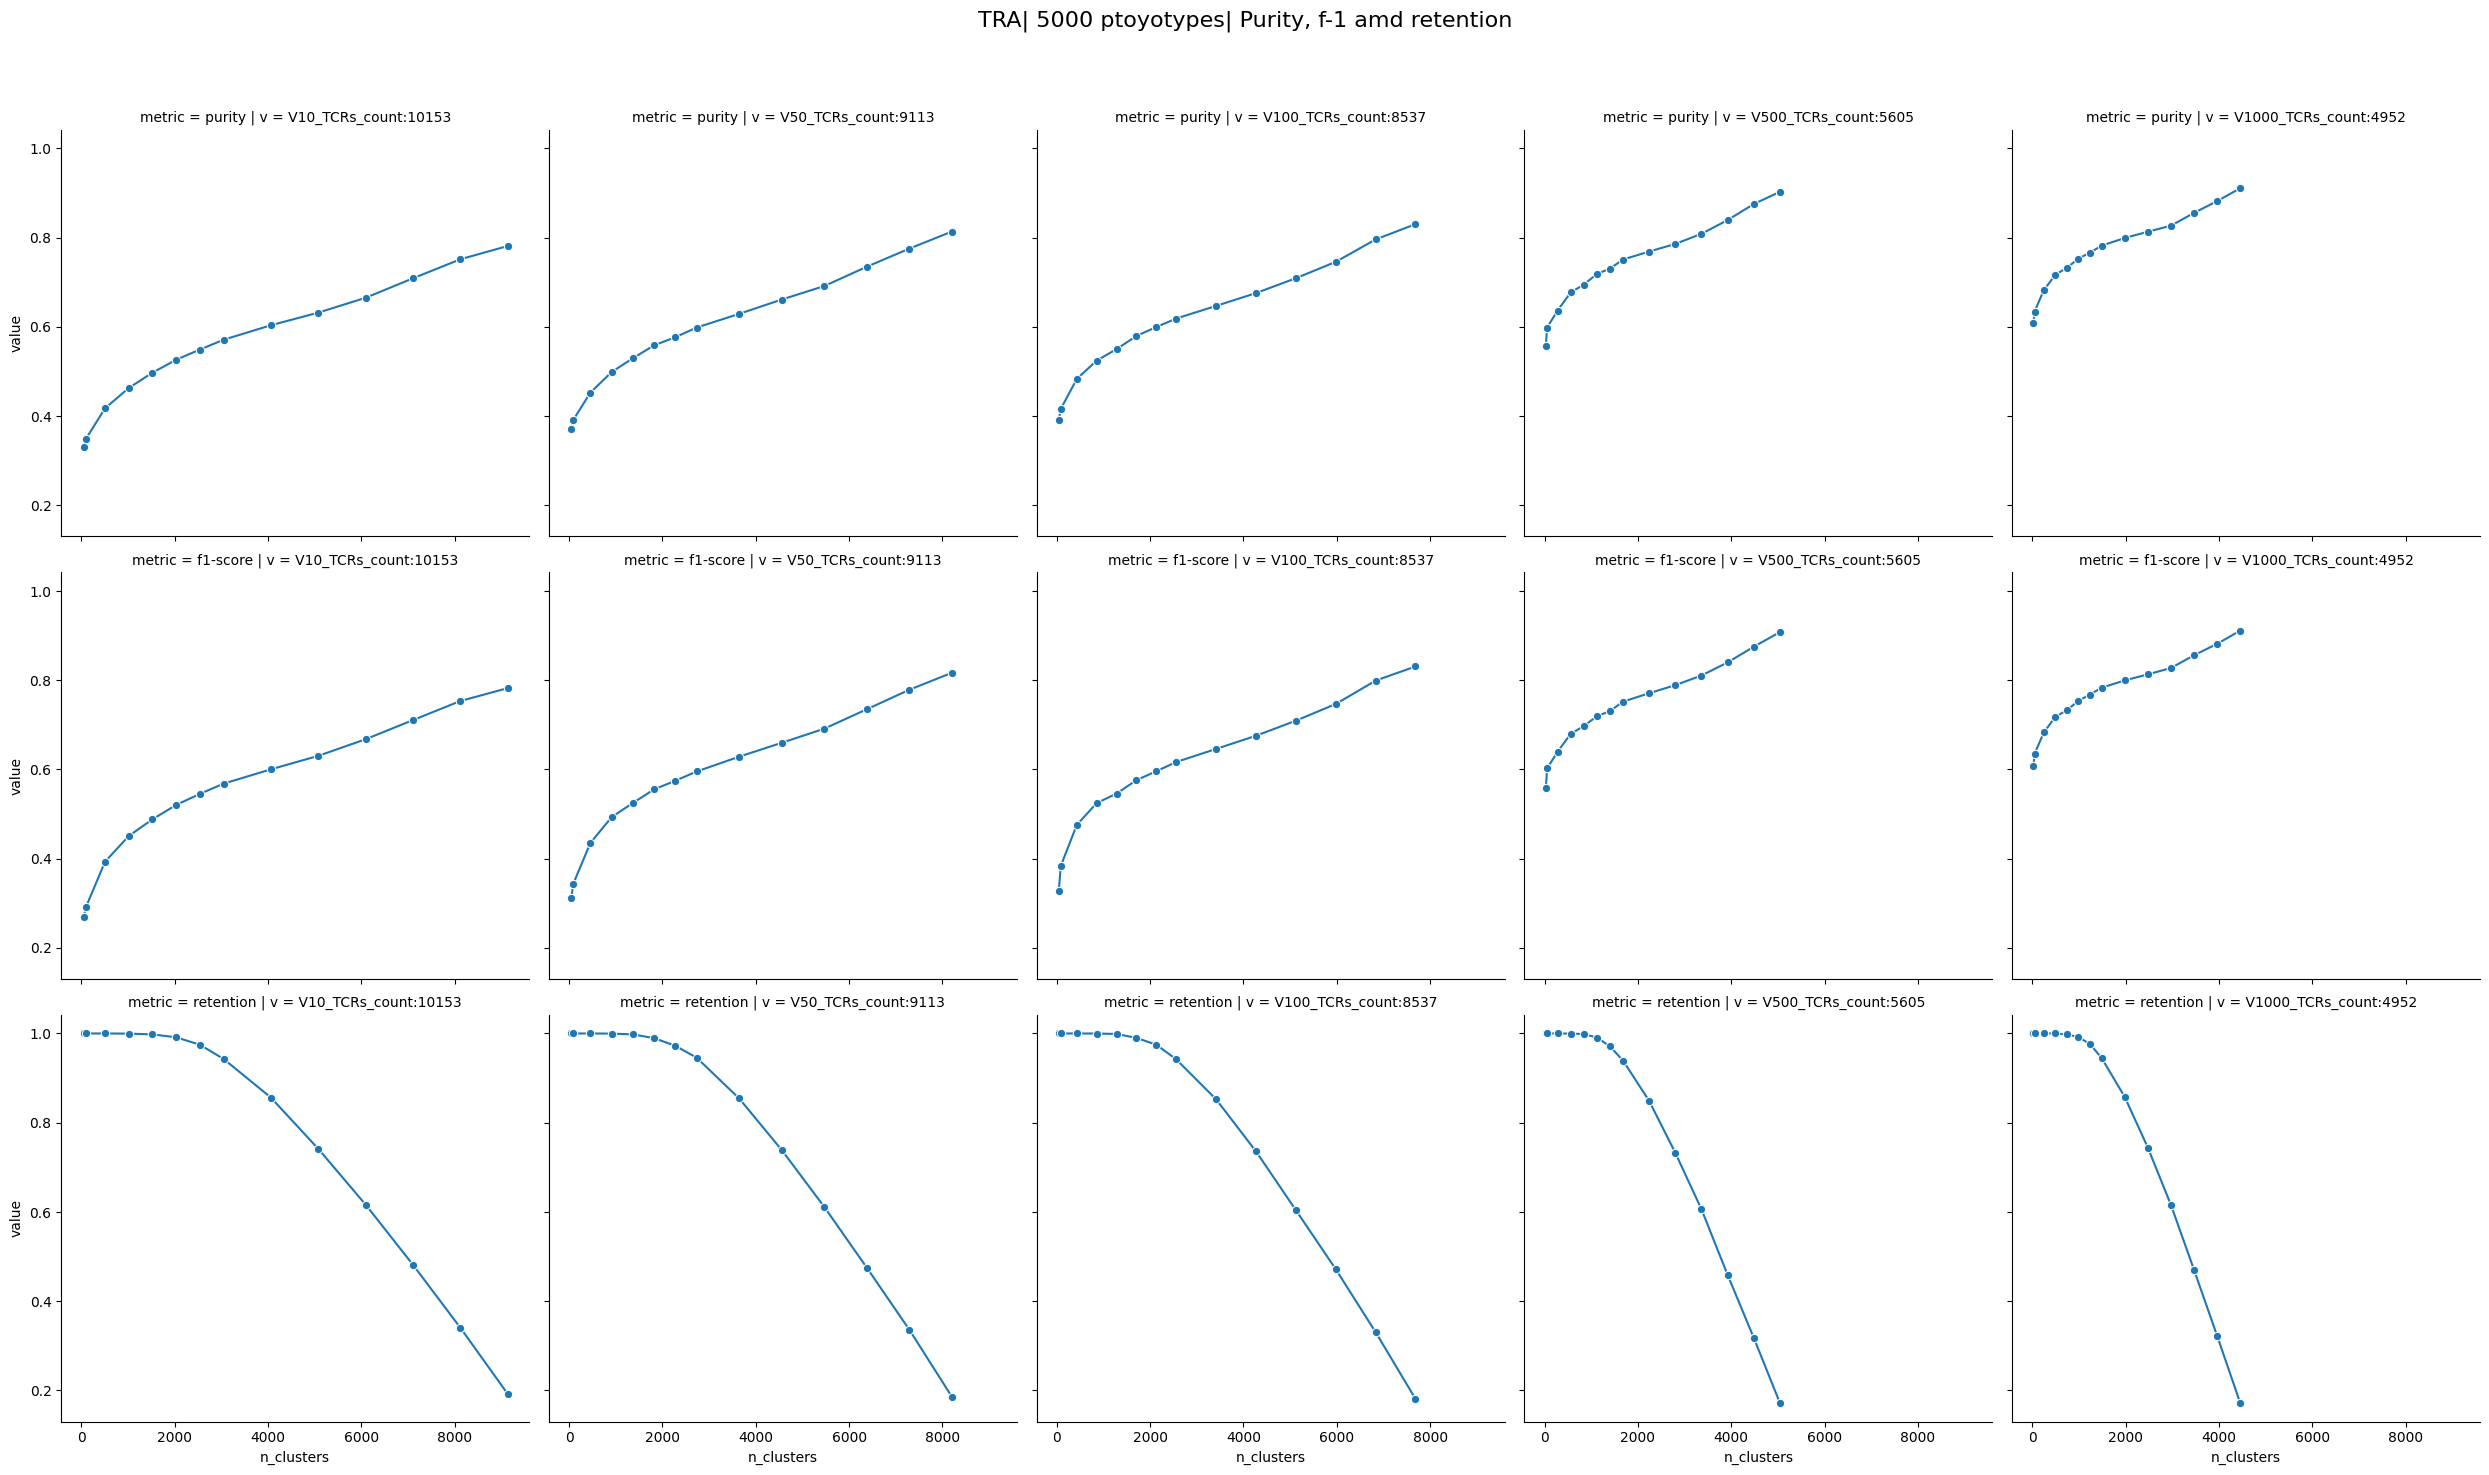

In [25]:
metrics_df = pd.DataFrame(metrics_tcremb[method][n_prototypes][chain]).T
t = metrics_df[['purity','f1-score','retention','n_clusters','v']].melt(id_vars=['n_clusters','v'],var_name='metric')
g = sns.relplot(data = t, x = 'n_clusters', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"figures/tcremb_compare_{n_prototypes}_{method}_{chain}.png")

In [ ]:


chain = 'TRB'
metrics_tcremb[method][n_prototypes][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}_{n_prototypes}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    data_len = len(tcremb.pca_clones[chain])
    
    range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)                    
                        ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                        , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
    for j in range_n_clusters:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = KMeans(n_clusters=j)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['n_clusters']=j
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


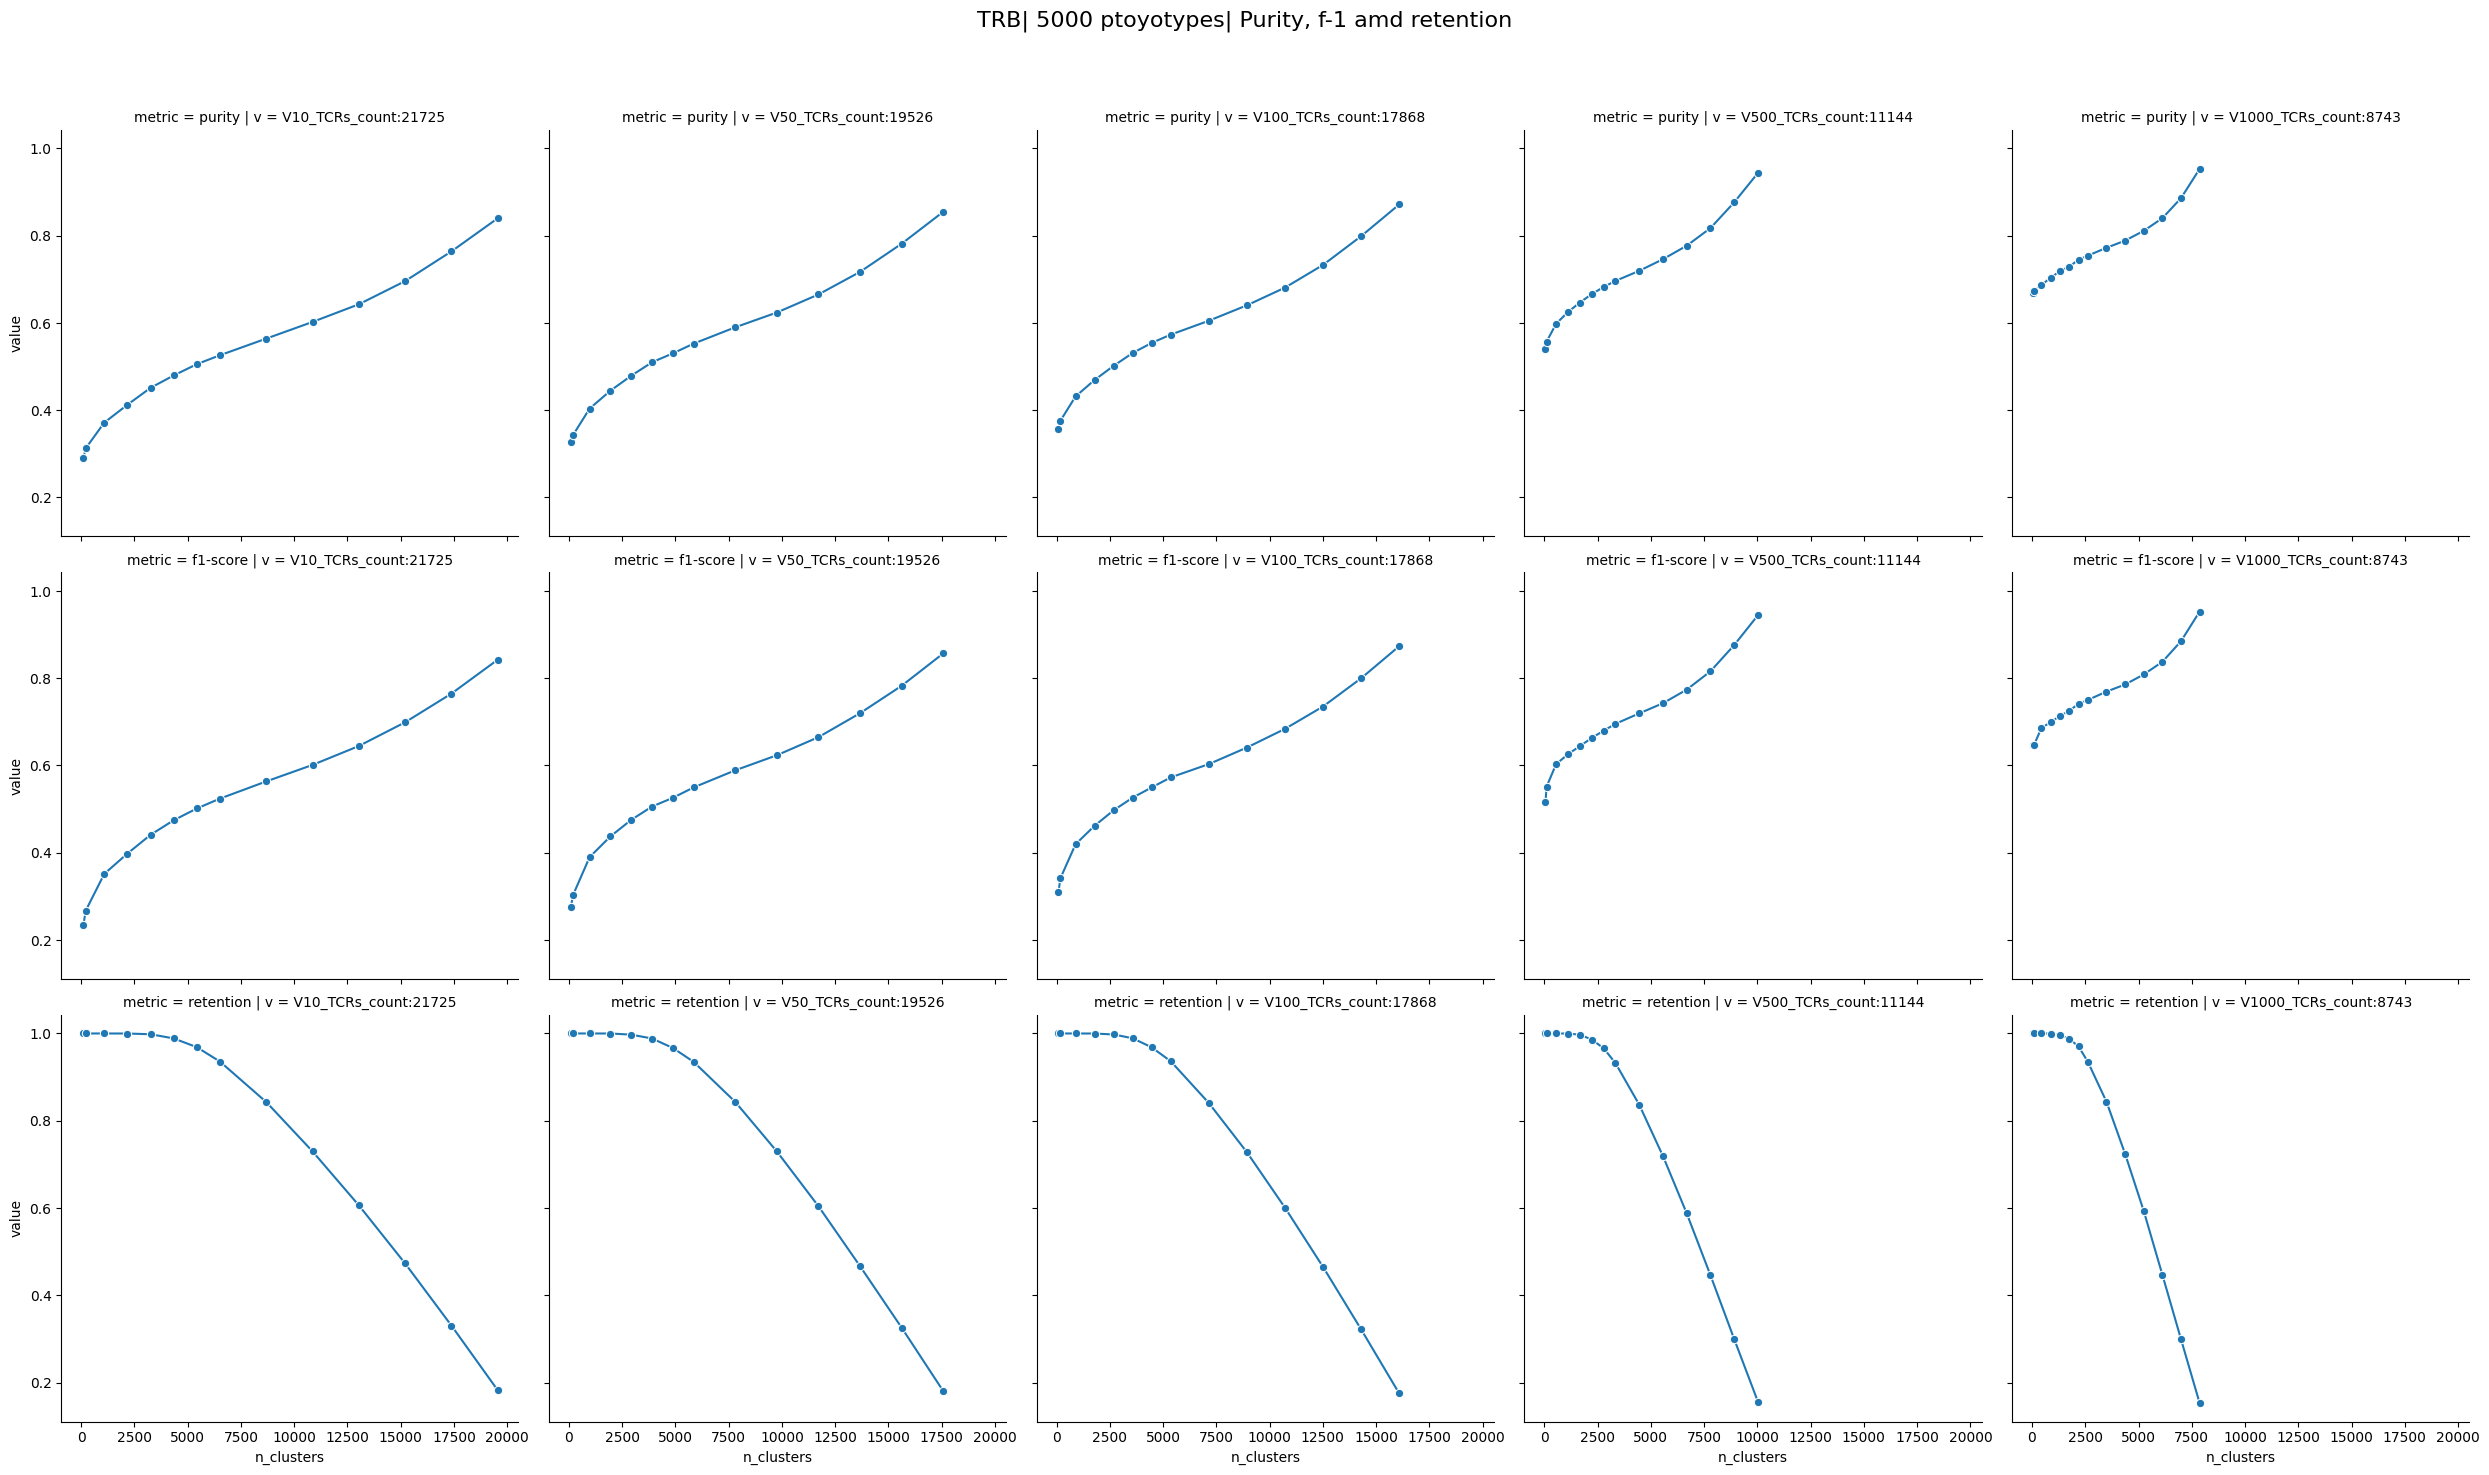

In [27]:
metrics_df = pd.DataFrame(metrics_tcremb[method][n_prototypes][chain]).T
t = metrics_df[['purity','f1-score','retention','n_clusters','v']].melt(id_vars=['n_clusters','v'],var_name='metric')
g = sns.relplot(data = t, x = 'n_clusters', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"figures/tcremb_compare_{n_prototypes}_{method}_{chain}.png")